In [26]:
from datetime import datetime, date, time
def timestamp(time):
    year = int(time[0:4])
    month = int(time[4:6])
    day = int(time[6:8])
    hr = int(time[8:10])
    mn = int(time[10:12])
    timestamp = datetime(year,month,day,hr,mn)
    return timestamp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import time
start_time = time.time()
#main()
#print("--- %s seconds ---" % (time.time() - start_time))

#data = pd.read_csv("999999-94077-2016.csv")
data = pd.read_csv("ISD.csv")
print(len(data))
data = data[data["TEMP"]!="****"]
print(len(data))
less = datetime(2017,3,1,0,0)
great = datetime(2017,1,5,0,0)
data["YR--MODAHRMN"] = data["YR--MODAHRMN"].apply(lambda x: timestamp(str(x)))
data["TEMP"] = data["TEMP"].apply(lambda x: int(x))
data = data[(data["YR--MODAHRMN"] < less)]
#data = data[(data["YR--MODAHRMN"] > great)]
print(len(data))
data = data.drop(["GUS","CLG","SKC","L","M","SLP","ALT","STP","MAX","MIN","PCP01","PCP06","PCP24","PCPXX","SD","VSB",
                  "AW","AW.1","AW.2","AW.3","W","DEWP","MW","MW.1","MW.2","MW.3","H","USAF","WBAN"],1)
print(data.head())
print(type(data))
print("--- %s seconds ---" % (time.time() - start_time))


63337
63083
16980
         YR--MODAHRMN  DIR SPD  TEMP
0 2017-01-01 00:00:00  184   8    47
1 2017-01-01 00:05:00  179   9    47
2 2017-01-01 00:10:00  181   9    47
3 2017-01-01 00:15:00  180   9    47
4 2017-01-01 00:20:00  171   7    47
<class 'pandas.core.frame.DataFrame'>
--- 0.5599782466888428 seconds ---


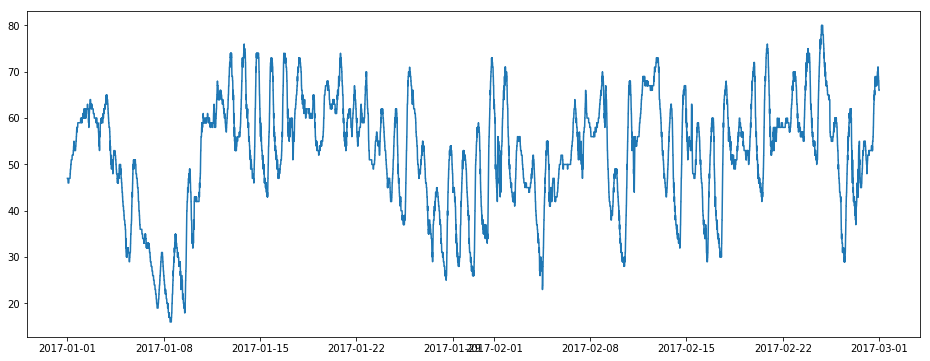

In [5]:
X = np.array(data["YR--MODAHRMN"])
Y = np.array(data["TEMP"])
plt.figure(figsize=(16,6))
plt.plot(X,Y)
#plt.title("Original ISD")
plt.show()

         YR--MODAHRMN  DIR SPD  TEMP
0 2017-01-01 00:00:00  184   8    47
1 2017-01-01 00:05:00  179   9    47
2 2017-01-01 00:10:00  181   9    47
3 2017-01-01 00:15:00  180   9    47
4 2017-01-01 00:20:00  171   7    47
--- 0.005003929138183594 seconds ---
--- 347.71728587150574 seconds ---
1868


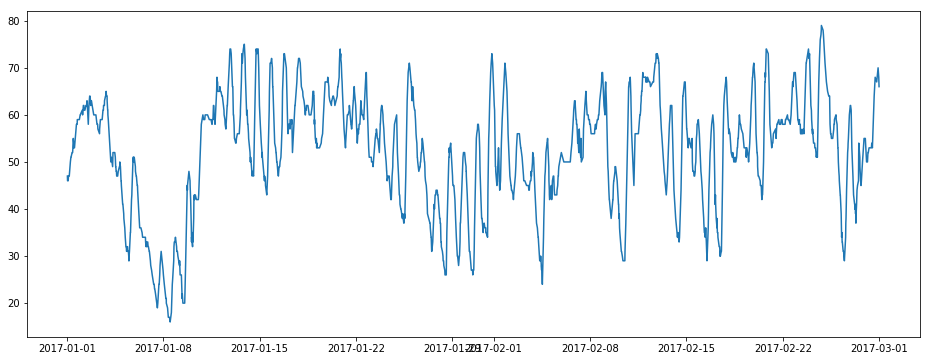

In [11]:
#Random Sampling
start = time.time()
df = data.sample(frac=0.11, replace=True)
print(data.head())
df = df.sort_values(["YR--MODAHRMN"])
end = time.time()
print("--- %s seconds ---" % (end - start))

df.to_csv('random.csv', sep=',')
print("--- %s seconds ---" % (time.time() - start_time))
x = np.array(df["YR--MODAHRMN"])
y = np.array(df["TEMP"])
print(x.size)
plt.figure(figsize=(16,6))
plt.plot(x,y)
#plt.title("Random sampling")
plt.show()

In [5]:
# #Stratified Sampling

# def split(s,data):
#     n = len(data)
#     size = n//s
#     mv = -1
#     frames = []
#     for i in range(0,s):
#         ds = data.iloc[i*size:(i+1)*size,:]
#         v = ds["TEMP"].values.var()
#         mv = max(mv,v)
#         if v == 0:
#             #print(ds)
#             print("{0}. {1}".format(i+1,v))
#     print(mv)
#     for i in range(0,s):
#         ds = data.iloc[i*size:(i+1)*size,:]
#         v = ds["TEMP"].values.std()
#         if v<=0.93:
#             v = .96
#         ds = ds.sample(frac = 1*(v/mv),replace= True)
#         frames.append(ds)
#     return frames
# frames = split(80,data)
# st =pd.concat(frames)
# print(len(st))

# st = st.sort_values(["YR--MODAHRMN"])
# x = np.array(st["YR--MODAHRMN"])
# y = np.array(st["TEMP"])
# #print(y.size)
# plt.figure(figsize=(16,6))
# plt.plot(x,y)
# plt.title("Stratified sampling")
# plt.show()

# df.to_csv('strat.csv', sep=',')

<class 'pandas.core.frame.DataFrame'>
--- 0.012001514434814453 seconds ---
--- 0.012001514434814453 seconds ---
1867


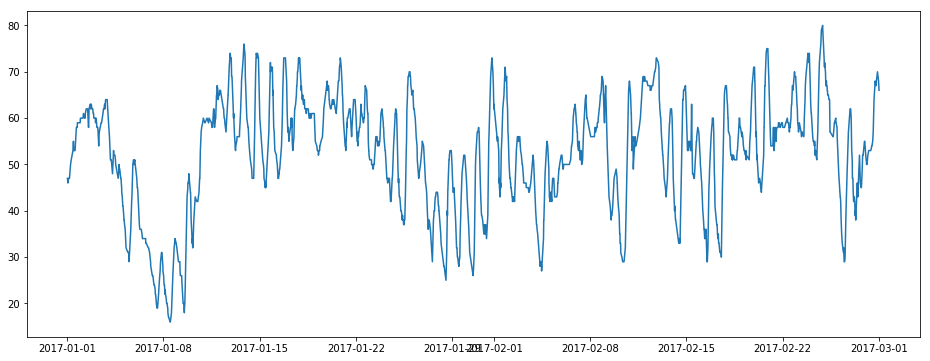

In [13]:
# #Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit
start = time.time()
sss = StratifiedShuffleSplit(n_splits=1, test_size=1 - 0.11, random_state=0)

T = [0]*data.shape[0]
traini= sss.split(data,T)
D = pd.DataFrame()
for t,i in traini:
    print(type(data.iloc[t]))
    D = data.iloc[t]
#print(D)
#print(D.shape)
D = D.sort_values(["YR--MODAHRMN"])
end = time.time()
print("--- %s seconds ---" % (end - start))
#print(len(D))
print("--- %s seconds ---" % (time.time() - start))
x = np.array(D["YR--MODAHRMN"])
y = np.array(D["TEMP"])
print(x.size)
plt.figure(figsize=(16,6))
plt.plot(x,y)
#plt.title("Stratified sampling")
plt.show()

In [16]:
#WIndow Sampling ((PASS)
import calendar

def toTimestamp(d):
  return calendar.timegm(d.timetuple())

'''def get_sample(data,theta=5):
    prev = 
    for i,row in data.iterrows():
        int'''
#d = data.iloc[1:len(data)]
#print(d.head())
#print(data.head())
# Window sampling algorithm
def get_sample(data,theta=2):
    prev = data.iloc[0]
    others = data.iloc[1:len(data)]
    start = prev;
    ret = []
    for index, row in others.iterrows():
        x1 = toTimestamp(start["YR--MODAHRMN"])
        x2 = toTimestamp(row["YR--MODAHRMN"])
        y1 = start["TEMP"]
        y2= row["TEMP"]
        slope = 1.0*(y2-y1)/(x2-x1);
        angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
        #print("%d %d"%(y2,y1))
        print(abs(angle))
        if abs(angle) >= theta:
            #print("Greater than theta")
            ret.append(start)
            ret.append(prev)
            start = row
        prev =  row
    return ret


#Window sampling algorithm modified
def window_sample(data,theta = 5):
    if(len(data) <=2):
        return data
    ret = []
    first = data.iloc[0]
    second = data.iloc[1]
    x1 = toTimestamp(first["YR--MODAHRMN"])
    x2 = toTimestamp(second["YR--MODAHRMN"])
    y1 = first["TEMP"]
    y2 = second["TEMP"]
    running_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
    current_angle = running_angle
    others = data.iloc[2:len(data)]
    ret.append(first)
    prev = second
    for index, current in others.iterrows():
        x1 = toTimestamp(prev["YR--MODAHRMN"])
        x2 = toTimestamp(current["YR--MODAHRMN"])
        y1 = prev["TEMP"]
        y2 = current["TEMP"]
        current_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
        #print("{0} {1} {2} {3} {4}".format(y1,y2,x1,x2,current_angle))
        if abs(current_angle - running_angle) > theta:
            running_angle = current_angle
            ret.append(prev)
            ret.append(current)
        prev = current
    ret.append(prev)
    return ret

start = time.time()
# S rate 11.309929
sample = window_sample(data,15.309929)
end = time.time()
print("--- %s seconds ---" % (end - start))
seen = {}
final = []
for a in sample:
    if  a["YR--MODAHRMN"] not in seen:
        final.append(a)
        seen[a["YR--MODAHRMN"]] = True
len(final)
print(len(final))

--- 1.4009604454040527 seconds ---
1759


<class 'pandas.core.frame.DataFrame'>


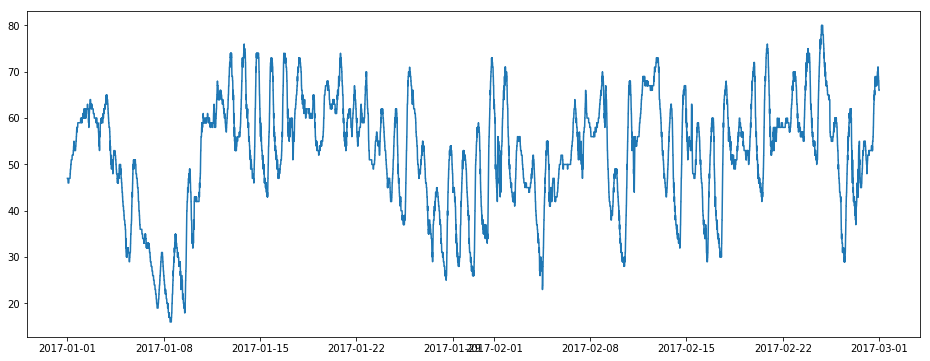

In [15]:
dframe = pd.DataFrame(final)
dextra = data[data["YR--MODAHRMN"].isin(dframe["YR--MODAHRMN"]) == False]
sss = StratifiedShuffleSplit(n_splits=1, test_size=1 - 0, random_state=0)

T = [0]*data.shape[0]
traini= sss.split(data,T)
ds = pd.DataFrame()
for t,i in traini:
    print(type(data.iloc[t]))
    ds = data.iloc[t]
frames = [dframe,ds]
dframe = pd.concat(frames)
dframe = dframe.sort_values(["YR--MODAHRMN"])
x = np.array(dframe["YR--MODAHRMN"])
y = np.array(dframe["TEMP"])
plt.figure(figsize=(16,6))
plt.plot(x,y)
#plt.title("Winsample")
plt.show()
#dframe.to_csv('winsample.csv', sep=',')

In [17]:
#ASAP

import sys
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import pandas as pd
import json
import numpy.fft
from decimal import Decimal
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import PAA
%matplotlib inline
# ASAP Simple (Brute Force)
def moving_average(data, _range):
    ret = np.cumsum(data, dtype=float)
    _range = int(_range)
    print(_range, "range")
    ret[_range:] = ret[_range:] - ret[:-_range]
    return ret[_range - 1:] / _range

def SMA(data, _range, slide):
    slide = int(slide)
    ret = moving_average(data, _range)[::slide]
    return list(ret)

def kurtosis(values):
    return scipy.stats.kurtosis(values)

def roughness(vals):
    return np.std(np.diff(vals))

def smooth_simple(data, max_window=5, resolution=None):
    data = np.array(data)
    # Preaggregate according to resolution
    window_size = 1
    slide_size = 1
    if resolution:
        slide_size = int(len(data) // resolution)
        if slide_size > 1:
            data = SMA(data, slide_size, slide_size)
    orig_kurt   = kurtosis(data)
    min_obj     = roughness(data)
    for w in range(2, len(data) // max_window + 1):
        smoothed = SMA(data, w, 1)
        if kurtosis(smoothed) >= orig_kurt:
            r = roughness(smoothed)
            if r < min_obj:
                min_obj = r
                window_size = w
    return window_size, slide_size
# ASAP
class Metrics(object):
    def __init__(self, values):
        self.set_values( values )

    def set_values(self, values):
        self.values = values
        self.r = self.k = None

    @property
    def kurtosis(self):
        if self.k is None:
            self.k = scipy.stats.kurtosis(self.values)
        return self.k

    @property
    def roughness(self):
        if self.r is None:
            self.r = np.std(np.diff(self.values))
        return self.r

class ACF(Metrics):
    CORR_THRESH = 0.2
    def __init__(self, values, max_lag=None):
        super(ACF, self).__init__(values)
        if max_lag is None:
            max_lag = len(values) / 5
        self.max_lag = int(max_lag)
        self.max_acf = 0.0

        # Calculate autocorrelation via FFT
        # Demean
        demeaned = values - np.mean(values)
        # Pad data to power of 2 
        l = int(2.0 ** (int(math.log(len(demeaned),2.0)) + 1))
        padded = np.append(demeaned, ([0.0] * (l - len(demeaned))))    
        # FFT and inverse FFT
        F_f = numpy.fft.fft( padded )
        R_t = numpy.fft.ifft( F_f * np.conjugate(F_f) )
        self.correlations = R_t[:int(max_lag)].real / R_t[0].real
        
        # Find autocorrelation peaks 
        self.peaks = []
        if len(self.correlations) >1 :
            positive = self.correlations[1] > self.correlations[0]
            max = 1
            for i in range(2, len(self.correlations)):
                if not positive and self.correlations[i] > self.correlations[i-1]:
                    max = i
                    positive = not positive
                elif positive and self.correlations[i] > self.correlations[max]:
                    max = i
                elif positive and self.correlations[i] < self.correlations[i-1]:
                    if max > 1 and self.correlations[max] > self.CORR_THRESH:
                        self.peaks.append(max)
                        if self.correlations[max] > self.max_acf:
                            self.max_acf = self.correlations[max]
                    positive = not positive
        # If there is no autocorrelation peak within the MAX_WINDOW boundary,
        # try windows from the largest to the smallest 
        if len(self.peaks) <= 1:
            self.peaks = range(2, len(self.correlations))
                    
def moving_average(data, _range):
    ret = np.cumsum(data)
    _range = int(_range)
    ret[_range:] = ret[_range:] - ret[:-_range]
    return ret[_range - 1:] / _range

def SMA(data, _range, slide):
    slide = int(slide)
    _range = int(_range)
    ret = moving_average(data, _range)[::slide]
    return list(ret)
                    
def binary_search(head,tail,data,min_obj,orig_kurt,window_size):
    while head <= tail:
        w = int(round((head + tail) / 2.0))
        smoothed = SMA(data,w,1)
        metrics  = Metrics(smoothed)
        if metrics.kurtosis >= orig_kurt:
            if metrics.roughness < min_obj:
                window_size = w
                min_obj = metrics.roughness
            head = w + 1
        else:
            tail = w - 1
    return window_size

def smooth_ASAP(data, max_window=5, resolution=None):
    data = np.array(data)
    # Preaggregate according to resolution
    slide_size = 1
    window_size = 1
    if resolution and len(data) >= 2 * resolution:
        slide_size = len(data) / resolution
        data = SMA(data, slide_size, slide_size)
    acf         = ACF(data, max_lag=len(data) / max_window)
    peaks       = acf.peaks
    orig_kurt   = acf.kurtosis
    min_obj     = acf.roughness
    lb          = 1
    largest_feasible = -1
    tail = len(data) / max_window
    for i in range(len(peaks) - 1, -1, -1):
        w = peaks[i]

        if w < lb or w == 1:
            break
        elif math.sqrt(1 - acf.correlations[w]) * window_size > math.sqrt(1 - acf.correlations[window_size]) * w:
            continue

        smoothed = SMA(data, w, 1)
        metrics = Metrics(smoothed)
        if metrics.roughness < min_obj and metrics.kurtosis >= orig_kurt:
            min_obj = metrics.roughness
            window_size = w
            lb = round( max(w*math.sqrt( (acf.max_acf -1) / (acf.correlations[w]-1) ), lb) )
    if largest_feasible > 0:
        if largest_feasible < len(peaks) - 2:
            tail = peaks[largest_feasible + 1]
        lb = max(lb, peaks[largest_feasible] + 1)

    window_size = binary_search(lb, tail, data, min_obj, orig_kurt, window_size)
    return window_size, slide_size

[73803.0, 73803.0, 73803.0, 73803.0]
     USAF   WBAN  YR--MODAHRMN  DIR SPD  GUS  CLG  SKC  L  M ...     SLP  \
0  999999  73803  2.017010e+11  184   8  ***  ***  ***  *  * ...  ******   
1  999999  73803  2.017010e+11  179   9  ***  ***  ***  *  * ...  ******   
2  999999  73803  2.017010e+11  181   9  ***  ***  ***  *  * ...  ******   
3  999999  73803  2.017010e+11  180   9  ***  ***  ***  *  * ...  ******   
4  999999  73803  2.017010e+11  171   7  ***  ***  ***  *  * ...  ******   

     ALT     STP  MAX  MIN  PCP01  PCP06  PCP24  PCPXX  SD  
0  *****  ******   47   47      0  *****  *****  *****  **  
1  *****  ******  ***  ***  *****  *****  *****  *****  **  
2  *****  ******  ***  ***  *****  *****  *****  *****  **  
3  *****  ******  ***  ***  *****  *****  *****  *****  **  
4  *****  ******  ***  ***  *****  *****  *****  *****  **  

[5 rows x 33 columns]
--- 0.030000925064086914 seconds ---
993


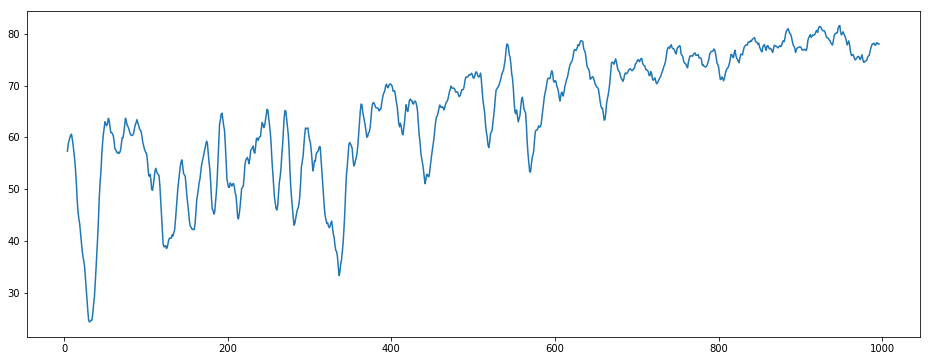

In [21]:
# Plot time series before and after smoothing ASAP
def plot(data, window_size, slide_size):
    plt.clf()
    plt.figure()
    data = SMA(data, slide_size, slide_size)
    print("Data size", len(data))
    method_names = ["Original", "Smoothed"]
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    smoothed = SMA(data, window_size, 1)
    smoothed_range = range(int(window_size/2), int(window_size/2) + len(smoothed))
    ax1.set_xlim(0, len(data))
    ax1.plot(data, linestyle='-', linewidth=1.5)
    ax2.plot(smoothed_range, smoothed, linestyle='-', linewidth=1.5)
    axes = [ax1, ax2]
    for i in range(2):
        axes[i].get_xaxis().set_visible(False)
        axes[i].text(0.02, 0.8, "%s" %(method_names[i]),
            verticalalignment='center', horizontalalignment='left',
            transform=axes[i].transAxes, fontsize=25)

    fig.set_size_inches(16, 6)
    plt.tight_layout(w_pad=1)
    plt.show()
    return data
# Read data from CSV
def load_csv(fname, input_column=1):
    import csv
    with open(fname, 'r') as ifh:
        icsv = csv.reader(ifh)
        if sys.version_info.major == 2:
            header = icsv.next()
        else:
            header = next(icsv)
        rows = list(icsv)

        try:
            data = [ float(x[input_column]) for x in rows ]
        except ValueError:
            print("couldn't convert input-column={0} float".format(input_column))
            if rows:
                print("first row:")
                for idx,x in enumerate(rows[0]):
                    print('  column {:3d}: {}'.format(idx,x))
            exit(1)
    return data
# Temp ASAP
import sys
import numpy as np
isd_data = load_csv('ISD.csv')
print(isd_data[1:5])
di = pd.read_csv("ISD.csv")
di = di[di["TEMP"]!="****"]
isd = di["TEMP"]
isd.to_csv("isdt.csv")
isd_data = load_csv('isdt.csv')


print(di.head())
start = time.time()
win_size, s_size = smooth_ASAP(isd_data, resolution=1000)
#window_size, slide_size = smooth_simple(raw_data, resolution=1000)
data = SMA(isd_data, s_size, s_size)
smoothed = SMA(data, win_size, 1)
smoothed_range = range(int(win_size/2), int(win_size/2) + len(smoothed))
end = time.time()
print("--- %s seconds ---" % (end - start))
print(len(smoothed))


#plot(temp_data, win_size, s_size)

plt.figure(figsize=(16,6))
plt.plot(smoothed_range,smoothed)


#plt.axis('off')
#plt.title("ASAP")
#plt.savefig('window_taxi.pdf')
plt.show()

Window Size:  9
Data size 1001


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

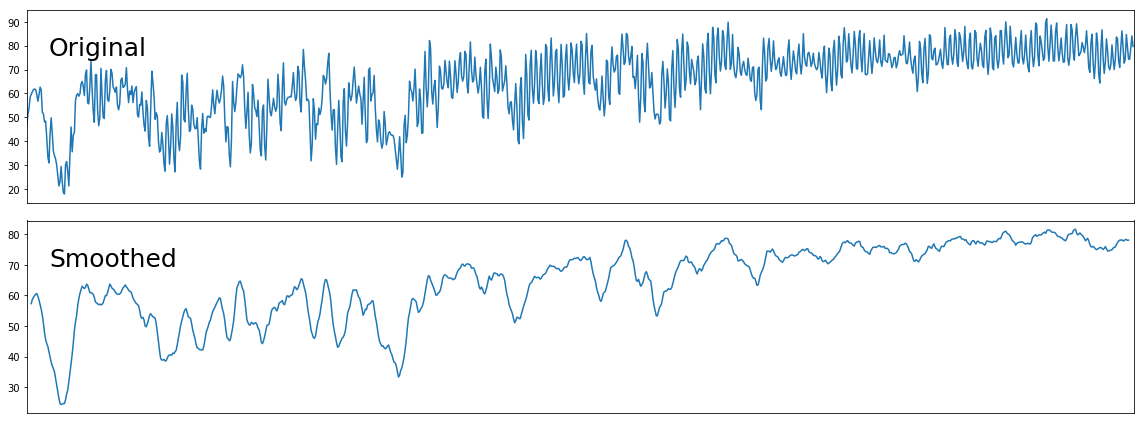

[46.904761904761905,
 51.222222222222221,
 53.873015873015873,
 58.476190476190474,
 59.587301587301589,
 60.730158730158728,
 61.61904761904762,
 61.841269841269842,
 61.61904761904762,
 59.555555555555557,
 56.730158730158728,
 59.349206349206348,
 62.634920634920633,
 61.460317460317462,
 52.174603174603178,
 51.412698412698411,
 48.047619047619051,
 48.428571428571431,
 41.523809523809526,
 33.507936507936506,
 30.888888888888889,
 42.777777777777779,
 49.80952380952381,
 43.333333333333336,
 35.841269841269842,
 33.952380952380949,
 32.555555555555557,
 30.015873015873016,
 25.777777777777779,
 21.222222222222221,
 23.111111111111111,
 29.412698412698411,
 23.047619047619047,
 18.523809523809526,
 17.904761904761905,
 30.126984126984127,
 31.49206349206349,
 27.238095238095237,
 21.238095238095237,
 34.333333333333336,
 45.984126984126981,
 35.539682539682538,
 42.523809523809526,
 43.61904761904762,
 57.095238095238095,
 59.269841269841272,
 59.920634920634917,
 58.85714285714285

In [18]:
# ISD
import sys
import numpy as np
isd_data = load_csv('isdt.csv')
win_size, s_size = smooth_ASAP(isd_data, resolution=1000)
#window_size, slide_size = smooth_simple(raw_data, resolution=1000)
print("Window Size: ", win_size)
plot(isd_data, win_size, s_size)

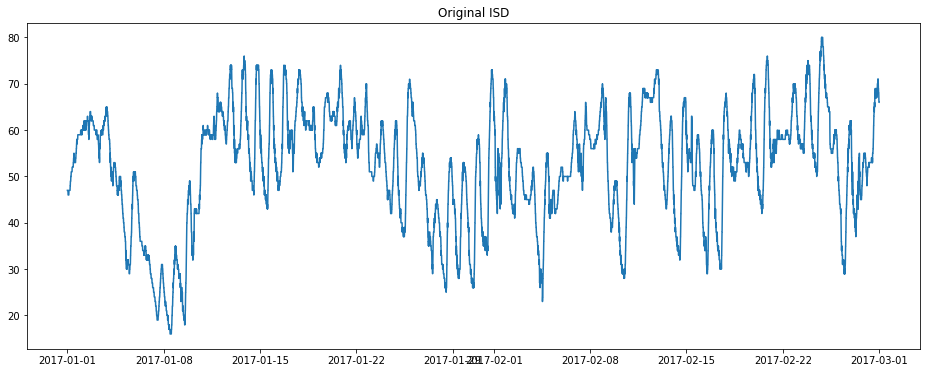

In [28]:
X = np.array(data["YR--MODAHRMN"])
Y = np.array(data["TEMP"])
plt.figure(figsize=(16,6))
plt.plot(X,Y)
plt.title("Original ISD")
plt.show()

In [24]:
#Window Sampling Again

#Window Sampling
import calendar
import numpy as np

def toTimestamp(d):
  return calendar.timegm(d.timetuple())
def window_sample2(data,theta = 5):
    y = "value"
    x = "x"
    if(len(data) <=2):
        return data
    ret = []
    first =  data.iloc[0]
    second = data.iloc[1]
    x1 = toTimestamp(first[x])
    x2 = toTimestamp(second[x])
    y1 = first[y]
    y2 = second[y]
    running_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
    current_angle = running_angle
    others = data.iloc[2:len(data)]
    ret.append(first)
    prev = second
    for index, current in others.iterrows():
        x1 = toTimestamp(prev[x])
        x2 = toTimestamp(current[x])
        y1 = prev[y]
        y2 = current[y]
        current_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
        #print("{0} {1} {2} {3} {4}".format(y1,y2,x1,x2,current_angle))
        if abs(current_angle - running_angle) > theta:
            running_angle = current_angle
            ret.append(prev)
            #ret.append(current)
        prev = current
    ret.append(prev)
    return ret
import calendar

import calendar

def toTimestamp(d):
  return calendar.timegm(d.timetuple())
def window_sample_p(data,theta = 5):
    y = "value"
    x = "x"
    if(len(data) <=2):
        return data
    ret = []
    first = data.iloc[0]
    second = data.iloc[1]
    x1 = first[x]
    x2 = second[x]
    y1 = first[y]
    y2 = second[y]
    running_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
    current_angle = running_angle
    others = data.iloc[2:len(data)]
    ret.append(first)
    prev = second
    for index, current in others.iterrows():
        x1 = prev[x]
        x2 = current[x]
        y1 = prev[y]
        y2 = current[y]
        current_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
        #print("{0} {1} {2} {3} {4}".format(y1,y2,x1,x2,current_angle))
        if abs(current_angle - running_angle) > theta:
            running_angle = current_angle
            ret.append(prev)
            #ret.append(current)
        prev = current
    ret.append(prev)
    return ret
t = 0
def window_sample_p(data,theta = 5):
    y = "value"
    x = "x"
    if(len(data) <=2):
        return data
    ret = []
    first = data.iloc[0]
    second = data.iloc[1]
    x1 = first[x]
    x2 = second[x]
    y1 = first[y]
    y2 = second[y]
    running_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
    current_angle = running_angle
    others = data.iloc[2:len(data)]
    ret.append(first)
    prev = second
    for index, current in others.iterrows():
        x1 = prev[x]
        x2 = current[x]
        y1 = prev[y]
        y2 = current[y]
        current_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
        #print("{0} {1} {2} {3} {4}".format(y1,y2,x1,x2,current_angle))
        if abs(current_angle - running_angle) > theta:
            running_angle = current_angle
            ret.append(prev)
            #ret.append(current)
        prev = current
    ret.append(prev)
    return ret
def fn(x):
    global t
    t = t + 1
    return t
def window_sample(data,theta = 5):
    col = "TEMP"
    if(len(data) <=2):
        return data
    ret = []
    first = data.iloc[0]
    second = data.iloc[1]
    x1 = toTimestamp(first["YR--MODAHRMN"])
    x2 = toTimestamp(second["YR--MODAHRMN"])
    y1 = first[col]
    y2 = second[col]
    running_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
    current_angle = running_angle
    others = data.iloc[2:len(data)]
    ret.append(first)
    prev = second
    for index, current in others.iterrows():
        x1 = toTimestamp(prev["YR--MODAHRMN"])
        x2 = toTimestamp(current["YR--MODAHRMN"])
        y1 = prev[col]
        y2 = current[col]
        current_angle = np.rad2deg(np.arctan2(1.0*(y2-y1), 1.0*(x2-x1)/60))
        #print("{0} {1} {2} {3} {4}".format(y1,y2,x1,x2,current_angle))
        if abs(current_angle - running_angle) > theta:
            running_angle = current_angle
            ret.append(prev)
            #ret.append(current)
        prev = current
    ret.append(prev)
    return ret

In [38]:

# Win sample
#sample = window_sample(data,15.3)

#print(len(sample))
#dframe = pd.DataFrame(sample)
#print(dframe.head())
#x = np.array(dframe["YR--MODAHRMN"])
#y = np.array(dframe["TEMP"])
#plt.figure(figsize=(16,6))
#plt.plot(x,y)

isd_data = pd.read_csv("ISD.csv")
isd_data = isd_data[isd_data["TEMP"]!="****"]
isd_data = isd_data[isd_data["DIR"]!="***"]

1768
0.021997690200805664


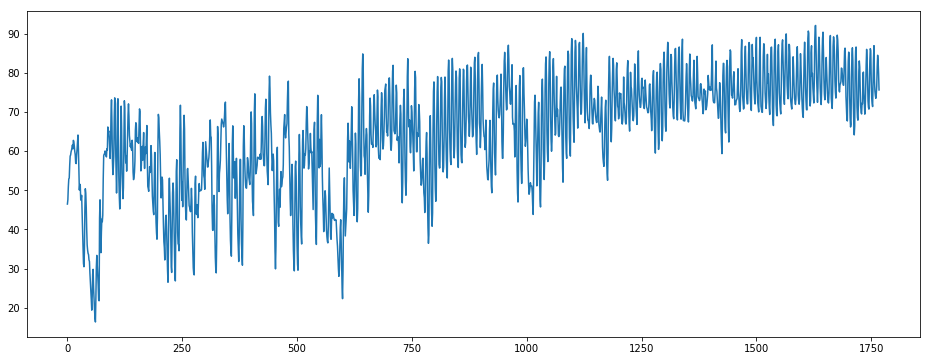

In [58]:
#PAA
start=time.time()
window_size = 35
paa = PAA(window_size=window_size)
X_paa = paa.transform([isd_data["TEMP"]])
print(len(X_paa[0]))
end=time.time()
plt.figure(figsize=(16,6))
print(end-start)
#plt.title("PAA(Window Size=7)")
plt.plot(X_paa[0])
plt.show()

10312


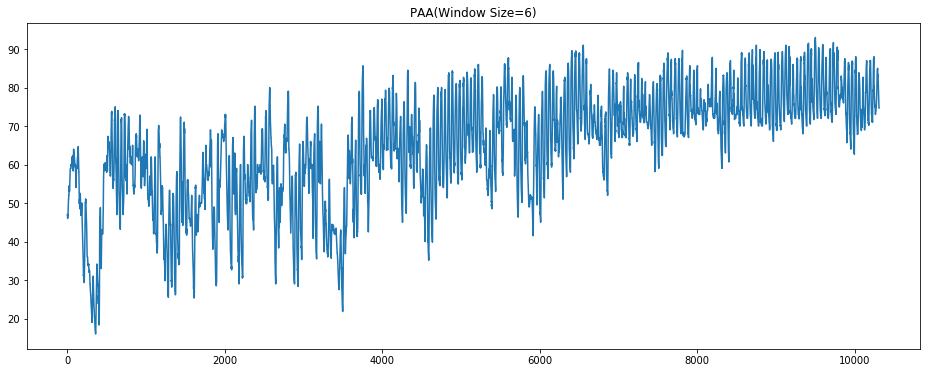

In [60]:
#PAA
window_size = 6
paa = PAA(window_size=window_size)
X_paa = paa.transform([isd_data["TEMP"]])
print(len(X_paa[0]))
plt.figure(figsize=(16,6))
plt.title("PAA(Window Size=6)")
plt.plot(X_paa[0])
plt.show()

In [62]:
#M4

#M4
start=time.time()
w = 450
print(4 * w)
isd_data = pd.read_csv("ISD.csv")
isd_data = isd_data[isd_data["TEMP"]!="****"]
isd_data = isd_data[isd_data["DIR"]!="***"]

start=time.time()
isd_data.shape
isd_data.head()
def m4(data, w):
    wsize = data.shape[0]//w
    ret = []
    seen = {}
    for g in range(0,w):
        maxv = None
        minv = None
        first = None
        last = None
        indices = [0,0,0,0]
        for i in range(g*wsize, g*wsize + wsize):
            if minv is None:
                minv = data.iloc[i]
                indices[0] = i
            elif data.iloc[i]["TEMP"] < minv["TEMP"]:
                minv = data.iloc[i]
                indices[0] = i
            if maxv is None:
                maxv = data.iloc[i]
                indices[1] = i
            elif data.iloc[i].TEMP> maxv.TEMP:
                maxv = data.iloc[i]
                indices[1] = i
            if i == g*wsize:
                first = data.iloc[i]
                indices[2] = i
            if i == g*wsize + wsize - 1:
                last = data.iloc[i]
                indices[3] = i
        indices.sort()
        for j in range(0, len(indices)):
            if indices[j] in seen:
                continue
            seen[j] = True
            ret.append(data.iloc[indices[j]])
    df = pd.DataFrame(ret)
    #df = df.sort_values("timestamp")
    return df
ret = m4(isd_data,w)
end=time.time()
print(end-start)

1800
18.471362590789795


1800


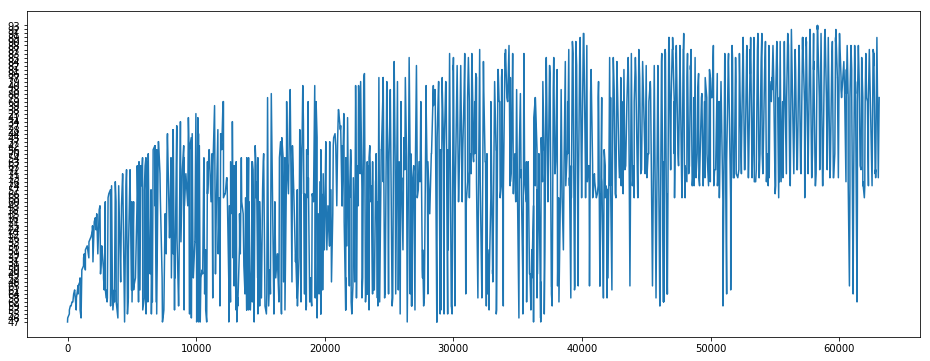

In [64]:
#M4

plt.figure(figsize=(16,6))
plt.plot(ret["TEMP"])
print(len(ret["TEMP"]))
fig = plt.gcf()
#plt.title("M4")
#plt.savefig('M4_taxi.pdf')
plt.show()

15.749233484268188
1800


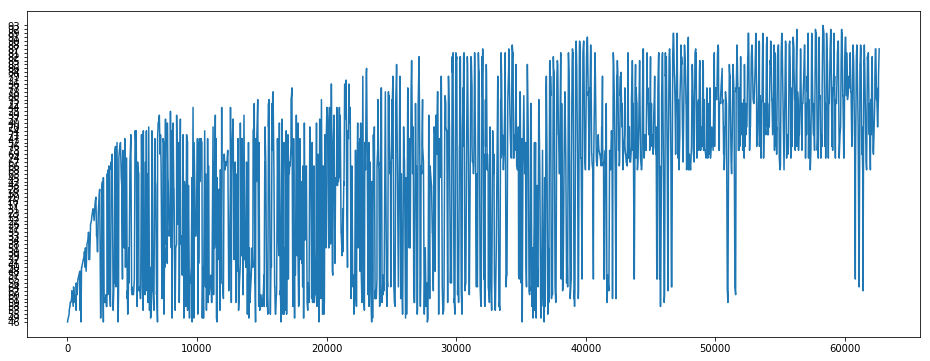

In [66]:
#MinMax
start=time.time()
def minmax(data, w):
    wsize = data.shape[0]//w
    ret = []
    seen = {}
    for g in range(0,w):
        maxv = None
        minv = None
        indices = [0,0]
        for i in range(g*wsize, g*wsize + wsize):
            if minv is None:
                minv = data.iloc[i]
                indices[0] = i
            elif data.iloc[i]["TEMP"] < minv["TEMP"]:
                minv = data.iloc[i]
                indices[0] = i
            if maxv is None:
                maxv = data.iloc[i]
                indices[1] = i
            elif data.iloc[i].TEMP > maxv.TEMP:
                maxv = data.iloc[i]
                indices[1] = i
        indices.sort()
        for j in range(0, len(indices)):
            if indices[j] in seen:
                continue
            seen[j] = True
            ret.append(data.iloc[indices[j]])
    df = pd.DataFrame(ret)
    #df = df.sort_values("timestamp")
    return df

ret = minmax(isd_data,2*w)
end=time.time()
print(end-start)
#Minmax

plt.figure(figsize=(16,6))
plt.plot(ret["TEMP"])
print(len(ret["TEMP"]))
fig = plt.gcf()
#plt.title("Minmax")
#plt.savefig('M4_taxi.pdf')
plt.show()

In [76]:
#RDP
from datetime import datetime, date, time
def timestamp(time):
    year = int(time[0:4])
    month = int(time[4:6])
    day = int(time[6:8])
    hr = int(time[8:10])
    mn = int(time[10:12])
    timestamp = datetime(year,month,day,hr,mn)
    return timestamp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import time
start_time = time.time()
#main()
#print("--- %s seconds ---" % (time.time() - start_time))

#data = pd.read_csv("999999-94077-2016.csv")
data = pd.read_csv("ISD.csv")
print(len(data))
data = data[data["TEMP"]!="****"]
print(len(data))
less = datetime(2017,7,1,0,0)
great = datetime(2017,1,5,0,0)
data["YR--MODAHRMN"] = data["YR--MODAHRMN"].apply(lambda x: timestamp(str(x)))
data["TEMP"] = data["TEMP"].apply(lambda x: int(x))
data = data[(data["YR--MODAHRMN"] < less)]
#data = data[(data["YR--MODAHRMN"] > great)]
print(len(data))
data = data.drop(["GUS","CLG","SKC","L","M","SLP","ALT","STP","MAX","MIN","PCP01","PCP06","PCP24","PCPXX","SD","VSB",
                  "AW","AW.1","AW.2","AW.3","W","DEWP","MW","MW.1","MW.2","MW.3","H","USAF","WBAN"],1)
print(data.head())
print(type(data))
print("--- %s seconds ---" % (time.time() - start_time))

import calendar

def toTimestamp(d):
  return calendar.timegm(d.timetuple())
x = np.array(data["YR--MODAHRMN"].apply(lambda x : toTimestamp(x)))
y = np.array(data["TEMP"].apply(lambda x : int(x)))
D = []
for i in range(0,len(x)):
    D.append([x[i],y[i]])
from rdp import rdp
start = time.time()
dp = rdp(D,epsilon = 2.2)
end = time.time()
print("--- %s seconds ---" % (end - start))
len(dp)

63337
63083
52090
         YR--MODAHRMN  DIR SPD  TEMP
0 2017-01-01 00:00:00  184   8    47
1 2017-01-01 00:05:00  179   9    47
2 2017-01-01 00:10:00  181   9    47
3 2017-01-01 00:15:00  180   9    47
4 2017-01-01 00:20:00  171   7    47
<class 'pandas.core.frame.DataFrame'>
--- 0.5609843730926514 seconds ---
--- 32.80917000770569 seconds ---


1791

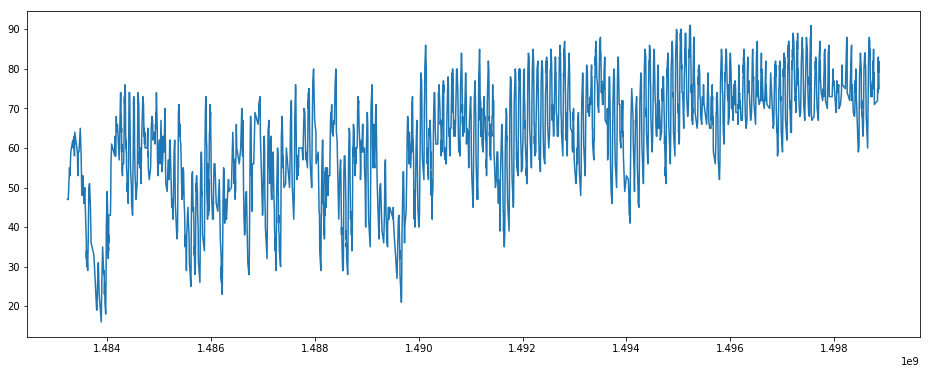

In [78]:
dframe = pd.DataFrame(dp)
#print(dframe.head())
x = np.array(dframe[0])
y = np.array(dframe[1])
plt.figure(figsize=(16,6))
plt.plot(x,y)
#plt.title("RDP sampling")
plt.show()
dframe["YR--MODAHRMN"] = dframe[0]
dframe["TEMP"] = dframe[1]
#dframe["TEMP"].size

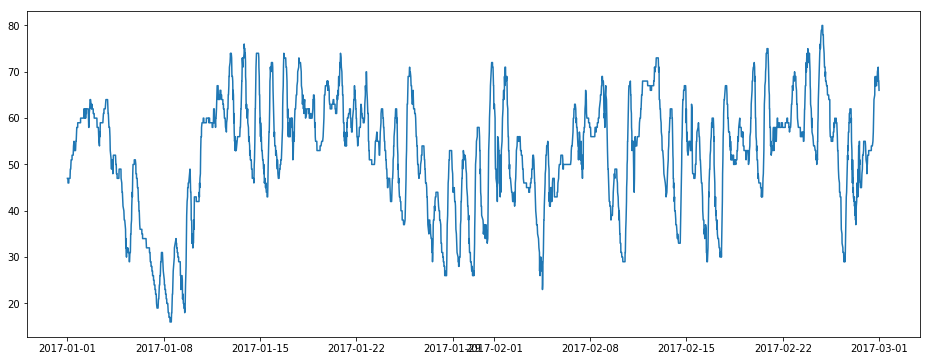

In [89]:
#VW
import visvalingamwyatt as vw
start = time.time()
D = []
for i in range(0,len(X)):
    D.append([X[i],Y[i]])
simplifier = vw.Simplifier(D)
vwd = simplifier.simplify(ratio = .10)
end = time.time()
#print("--- %s seconds ---" % (end - start))

#print(len(vwd))
dframe = pd.DataFrame(vwd)
x = np.array(dframe[0])
y = np.array(dframe[1])
plt.figure(figsize=(16,6))
plt.plot(x,y)
#plt.title("VWD sampling")
plt.show()

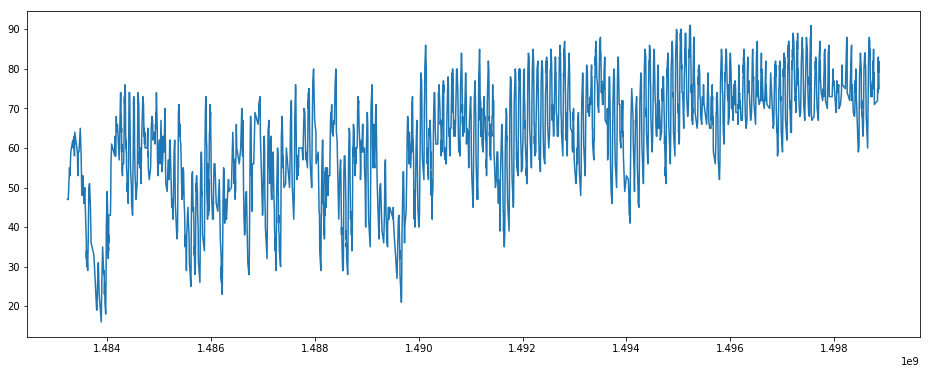

In [80]:
dframe = pd.DataFrame(dp)
dframe["YR--MODAHRMN"] = dframe[0]
dframe["TEMP"] = dframe[1]
#print(dframe.head())
x = np.array(dframe[0])
y = np.array(dframe[1])
plt.figure(figsize=(16,6))
plt.plot(x,y)
#plt.title("RDP sampling")
plt.show()

#dframe["TEMP"].size